# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application


## backgrounds
In this project, I want to scrap the top high school ranking data in Indonesia based on the UTBK values ​​from the LTMPT data center. LTMPT is an institution that administers college entrance tests for prospective new students. As the only institution administering standardized higher education tests in Indonesia. The purpose of scraping this data is to predict the ranking of the school in terms of UTBK scores. So we need to own the data, and scrapping is a great way to collect data that we don't have from the public.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests
url_get = requests.get('https://top-1000-sekolah.ltmpt.ac.id/')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<title>Top 1000 Sekolah Berdasarkan Nilai UTBK</title>\n\n<head>\n  <meta charset="utf-8">\n  <meta content="width=device-width, initial-scale=1.0" name="viewport">\n\n\n  \n  <!-- Favicons -->\n  <link rel="icon" href="https://ltmpt.ac.id/images/ristekdikti.ico">\n  <link rel="SHORTCUT ICON" href="https://ltmpt.ac.id/images/ristekdikti.ico">\n \n  <!-- Google Fonts -->\n  <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700,700i|Ralewa'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <title>
  Top 1000 Sekolah Berdasarkan Nilai UTBK
 </title>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- Favicons -->
  <link href="https://ltmpt.ac.id/images/ristekdikti.ico" rel="icon"/>
  <link href="https://ltmpt.ac.id/images/ristekdikti.ico" rel="SHORTCUT ICON"/>
  <!-- Google Fonts -->
  <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700,700i|Ral


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find('div', attrs={'class':'grid-view'})
print(table.prettify()[2600:3000])

   MAN INSAN CENDEKIA SERPONG
     <a ;="" class="btn-more" href="/site/page2022?id=1" style="float:right;">
      More..
     </a>
    </td>
    <td style="text-align:center">
     666,494
    </td>
    <td style="text-align:left">
     Prov. Banten
    </td>
    <td style="text-align:left">
     Kota Tangerang Selatan
    </td>
    <td style="text-align:center;">
     MA
    </td>
   </tr>
   <t


Finding row length.

In [7]:
table.find_all('td', attrs={'style':'text-align:center'})[:5]

[<td style="text-align:center"><i class="bx bxs-minus-square" style="color:grey"></i></td>,
 <td style="text-align:center">20623314</td>,
 <td style="text-align:center">666,494</td>,
 <td style="text-align:center"><i class="bx bxs-upvote" style="color:green"></i>11</td>,
 <td style="text-align:center">20532145</td>]

In [8]:
row = table.find_all('td', attrs={'style':'text-align:left'})
row_length = len(row)
row_length

200

In [10]:
tableHead = soup.thead
tableHead

<thead>
<tr><th style="width:4%;text-align:center;"><a data-sort="rank_nas" href="/?sort=rank_nas">Ranking</a></th><th style="width:5%"><a data-sort="ket" href="/?sort=ket"> </a></th><th style="width:4%;text-align:center;"><a data-sort="npsn" href="/?sort=npsn">NPSN</a></th><th style="width:30%"><a data-sort="nama_slta" href="/?sort=nama_slta">Sekolah</a></th><th style="width:5%;text-align:center;"><a data-sort="nilai_akhir" href="/?sort=nilai_akhir">Nilai Total</a></th><th style="width:10%"><a data-sort="provinsi" href="/?sort=provinsi">Provinsi</a></th><th style="width:13%"><a data-sort="kab_kota" href="/?sort=kab_kota">Kota/Kab.</a></th><th style="width:8%"><a data-sort="janis_slta" href="/?sort=janis_slta">Jenis</a></th></tr><tr class="filters" id="w0-filters"><td><input class="form-control" name="Peringkat2022Search[rank_nas]" type="text"/></td><td><input class="form-control" name="Peringkat2022Search[ket]" type="text"/></td><td><input class="form-control" name="Peringkat2022Searc

Do the scrapping process here (please change this markdown with your explanation)

In [11]:
row_headers = []
for x in tableHead.find_all('tr'):
    for y in x.find_all('th'):
        row_headers.append(y.text)
row_headers

['Ranking',
 ' ',
 'NPSN',
 'Sekolah',
 'Nilai Total',
 'Provinsi',
 'Kota/Kab.',
 'Jenis']

In [12]:
tableBody = soup.tbody
tableBody

<tbody>
<tr data-key="1"><td style="text-align:center;font-size:18px;font-weight:bold;">1</td><td style="text-align:center"><i class="bx bxs-minus-square" style="color:grey"></i></td><td style="text-align:center">20623314</td><td>MAN INSAN CENDEKIA SERPONG <a ;="" class="btn-more" href="/site/page2022?id=1" style="float:right;">More..</a></td><td style="text-align:center">666,494</td><td style="text-align:left">Prov. Banten</td><td style="text-align:left">Kota Tangerang Selatan</td><td style="text-align:center;">MA</td></tr>
<tr data-key="2"><td style="text-align:center;font-size:18px;font-weight:bold;">2</td><td style="text-align:center"><i class="bx bxs-upvote" style="color:green"></i>11</td><td style="text-align:center">20532145</td><td>SMA KATOLIK ST.LOUIS 1 <a ;="" class="btn-more" href="/site/page2022?id=2" style="float:right;">More..</a></td><td style="text-align:center">641,482</td><td style="text-align:left">Prov. Jawa Timur</td><td style="text-align:left">Kota Surabaya</td><t

In [13]:
tableValues = []
for x in tableBody.find_all('tr')[0:]:
    td_tags = x.find_all('td')
    td_val = [y.text for y in td_tags]
    tableValues.append(td_val)
tableValues

[['1',
  '',
  '20623314',
  'MAN INSAN CENDEKIA SERPONG More..',
  '666,494',
  'Prov. Banten',
  'Kota Tangerang Selatan',
  'MA'],
 ['2',
  '11',
  '20532145',
  'SMA KATOLIK ST.LOUIS 1 More..',
  '641,482',
  'Prov. Jawa Timur',
  'Kota Surabaya',
  'SMA'],
 ['3',
  '-',
  '69978389',
  'SMA PRADITA DIRGANTARA More..',
  '640,747',
  'Prov. Jawa Tengah',
  'Kab. Boyolali',
  'SMA'],
 ['4',
  '30',
  '69941723',
  'MAN INSAN CENDEKIA PEKALONGAN More..',
  '637,499',
  'Prov. Jawa Tengah',
  'Kota Pekalongan',
  'MA'],
 ['5',
  '-2',
  '20102568',
  'SMAN 8 JAKARTA More..',
  '635,347',
  'Prov. D.K.I. Jakarta',
  'Kota Jakarta Selatan',
  'SMA'],
 ['6',
  '6',
  '20107313',
  'SMA LABSCHOOL KEBAYORAN More..',
  '634,304',
  'Prov. D.K.I. Jakarta',
  'Kota Jakarta Selatan',
  'SMA'],
 ['7',
  '9',
  '20100170',
  'SMAS KANISIUS JAKARTA More..',
  '632,269',
  'Prov. D.K.I. Jakarta',
  'Kota Jakarta Pusat',
  'SMA'],
 ['8',
  '21',
  '20101622',
  'SMAN 2 JAKARTA More..',
  '631,421',

## Creating data frame & Data wrangling

Put the array into dataframe

In [14]:
import pandas as pd
df = pd.DataFrame(tableValues,columns=row_headers)
df.to_excel(r"D:\algo\Webscrapping-with-BeautifulSoup\ltmpt.xlsx",index=False)

In [15]:
df.head()

,Ranking,,NPSN,Sekolah,Nilai Total,Provinsi,Kota/Kab.,Jenis
0,1,,20623314,MAN INSAN CENDEKIA SERPONG More..,"666,494",Prov. Banten,Kota Tangerang Selatan,MA
1,2,11,20532145,SMA KATOLIK ST.LOUIS 1 More..,"641,482",Prov. Jawa Timur,Kota Surabaya,SMA
2,3,-,69978389,SMA PRADITA DIRGANTARA More..,"640,747",Prov. Jawa Tengah,Kab. Boyolali,SMA
3,4,30,69941723,MAN INSAN CENDEKIA PEKALONGAN More..,"637,499",Prov. Jawa Tengah,Kota Pekalongan,MA
4,5,-2,20102568,SMAN 8 JAKARTA More..,"635,347",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [16]:

temp = df[::-1]
temp

,Ranking,,NPSN,Sekolah,Nilai Total,Provinsi,Kota/Kab.,Jenis
99,100,116,20102571,SMAN 66 JAKARTA More..,"580,146",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA
98,99,70,20238524,SMK-SMAK BOGOR More..,"580,148",Prov. Jawa Barat,Kota Bogor,SMK
97,98,50,10259371,SMAS METHODIST 3 MEDAN More..,"580,203",Prov. Sumatera Utara,Kota Medan,SMA
96,97,-60,20107304,SMAS ISLAM AL-AZHAR 1 JAKARTA More..,"580,574",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA
95,96,67,20103292,SMAN 103 JAKARTA More..,"580,890",Prov. D.K.I. Jakarta,Kota Jakarta Timur,SMA
...,...,...,...,...,...,...,...,...
4,5,-2,20102568,SMAN 8 JAKARTA More..,"635,347",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA
3,4,30,69941723,MAN INSAN CENDEKIA PEKALONGAN More..,"637,499",Prov. Jawa Tengah,Kota Pekalongan,MA
2,3,-,69978389,SMA PRADITA DIRGANTARA More..,"640,747",Prov. Jawa Tengah,Kab. Boyolali,SMA
1,2,11,20532145,SMA KATOLIK ST.LOUIS 1 More..,"641,482",Prov. Jawa Timur,Kota Surabaya,SMA


In [17]:
import pandas as pd
df = pd.DataFrame(temp)
df.head()

,Ranking,,NPSN,Sekolah,Nilai Total,Provinsi,Kota/Kab.,Jenis
99,100,116,20102571,SMAN 66 JAKARTA More..,"580,146",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA
98,99,70,20238524,SMK-SMAK BOGOR More..,"580,148",Prov. Jawa Barat,Kota Bogor,SMK
97,98,50,10259371,SMAS METHODIST 3 MEDAN More..,"580,203",Prov. Sumatera Utara,Kota Medan,SMA
96,97,-60,20107304,SMAS ISLAM AL-AZHAR 1 JAKARTA More..,"580,574",Prov. D.K.I. Jakarta,Kota Jakarta Selatan,SMA
95,96,67,20103292,SMAN 103 JAKARTA More..,"580,890",Prov. D.K.I. Jakarta,Kota Jakarta Timur,SMA


In [18]:
df.dtypes

Ranking        object
               object
NPSN           object
Sekolah        object
Nilai Total    object
Provinsi       object
Kota/Kab.      object
Jenis          object
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [19]:
df.dtypes

Ranking        object
               object
NPSN           object
Sekolah        object
Nilai Total    object
Provinsi       object
Kota/Kab.      object
Jenis          object
dtype: object

In [20]:
df['Ranking'] = df['Ranking'].astype('int64')
df.dtypes

Ranking         int64
               object
NPSN           object
Sekolah        object
Nilai Total    object
Provinsi       object
Kota/Kab.      object
Jenis          object
dtype: object

In [21]:
df=df.set_index('Nilai Total')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='Nilai Total'>

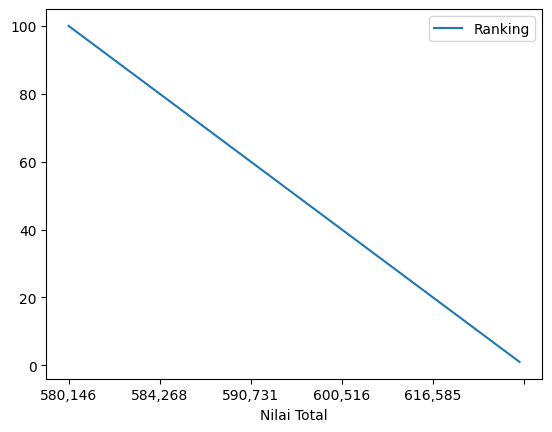

In [23]:
import matplotlib.pyplot as plt
df.plot()

Dari grafik diatas dapat kita prediksi ranking SMA berdasarkan nilai UTBK. Dengan nilai 616,585 merupakan nilai tertinggi dan nilai 580,146 nilai terendah.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.